# Mobile 고객 이탈 분석

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 가설1 : COLLEGE --> CHURN

대학졸업 여부와 이탈여부의 관련성

* 가설2 : REPORTED_SATISFACTION --> CHURN

만족도 설문과 이탈여부의 관련성

* 가설3 : CONSIDERING_CHANGE_OF_PLAN --> CHURN

변경 계획 설문과 이탈여부의 관련성

* 가설4 : OVERAGE --> CHURN

월 초과사용 시간과 이탈여부의 관련성

* 가설5 : LEFTOVER --> CHURN

월 사용 잔여시간과 이탈여부의 관련성

* 가설6 : HANDSET_PRICE --> CHURN

핸드폰 가격과 이탈여부의 관련성

* 가설7 : AVERAGE_CALL_DURATION --> CHURN

평균 통화시간과 이탈여부의 관련성

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) COLLEGE

- COLLEGE는 대학졸업 여부이며 0이면 졸업자가 아니고 1이면 졸업자이다.
- COLLEGE는 범주형 변수이다.

In [3]:
print('NAN 갯수 :', mobile['COLLEGE'].isna().sum())

NAN 갯수 : 0


- COLLEGE는 NAN인 값이 없다.

In [4]:
print(mobile['COLLEGE'].value_counts())
print(mobile['COLLEGE'].value_counts()/len(mobile['COLLEGE']))

1    9049
0    8951
Name: COLLEGE, dtype: int64
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


- 대학 졸업자의 비율이 50.3%, 대학을 졸업하지 않은 사람이 49.7%이다.

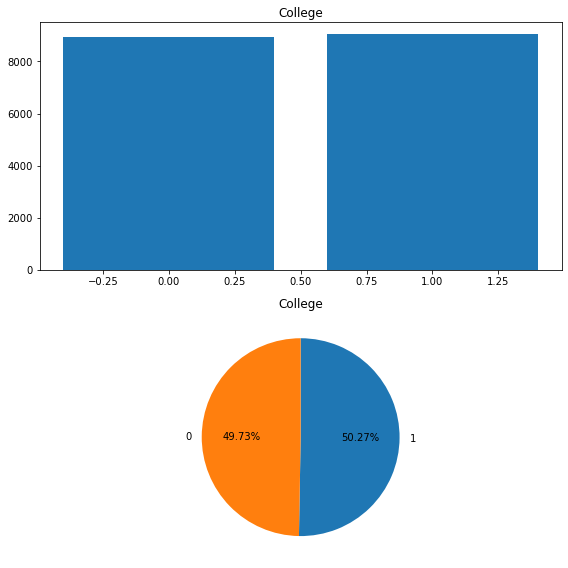

In [5]:
cnt = mobile['COLLEGE'].value_counts()

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.bar(cnt.index, cnt.values)
plt.title('College')

plt.subplot(2,1,2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       startangle=90, counterclock=False)
plt.title('College')

plt.tight_layout()
plt.show()

- 대학졸업 여부는 각각 49.7%, 50.3%로 거의 같다. 따라서 대학졸업자 비율은 1 대 1이다.
- 대학졸업 여부와 연 수입액, 이탈여부 등을 비교할 수 있을 것이다.

### 2) INCOME

- INCOME은 연 수입액이다.
- INCOME은 숫자형 변수이다.

In [6]:
print('NAN 갯수 :', mobile['INCOME'].isna().sum())

NAN 갯수 : 0


- INCOME은 NAN인 값이 없다.

In [7]:
print(mobile['INCOME'].describe())

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64


- 연 수입액은 평균 $80314이다. 

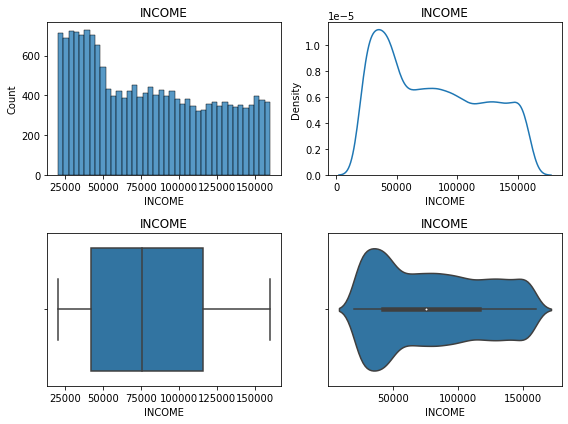

In [8]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x='INCOME', bins=40)
plt.title('INCOME')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x='INCOME')
plt.title('INCOME')

plt.subplot(2,2,3)
sns.boxplot(data=mobile, x='INCOME')
plt.title('INCOME')

plt.subplot(2,2,4)
sns.violinplot(data=mobile, x='INCOME')
plt.title('INCOME')

plt.tight_layout()
plt.show()

- 연 수입액의 평균에 비해 저소득자가 다수 존재한다.
- 연 수입액과 집 가격, 핸드폰 가격,  이탈 여부 등을 비교할 수 있을 것이다

### 3) OVERAGE

- OVERAGE은 월 초과사용 시간이다.
- OVERAGE은 숫자형 변수이다.

In [9]:
print('NAN 갯수 :', mobile['OVERAGE'].isna().sum())

NAN 갯수 : 0


- OVERAGE은 NAN인 값이 없다.

In [10]:
print(mobile['OVERAGE'].describe())

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64


- 월 초과사용 시간은 평균 86분이다. 단 최솟값은 -2분, 최댓값은 335분이다.

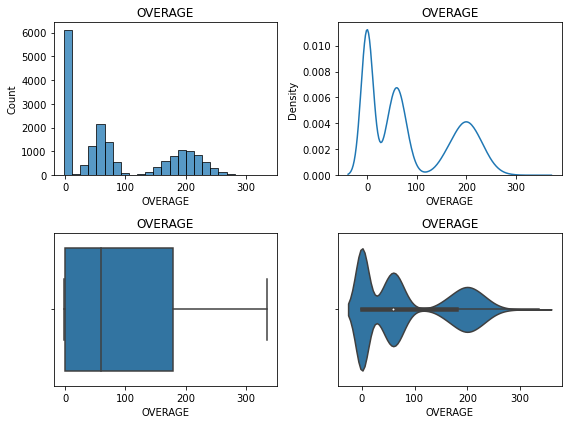

In [11]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x='OVERAGE')
plt.title('OVERAGE')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x='OVERAGE')
plt.title('OVERAGE')

plt.subplot(2,2,3)
sns.boxplot(data=mobile, x='OVERAGE')
plt.title('OVERAGE')

plt.subplot(2,2,4)
sns.violinplot(data=mobile, x='OVERAGE')
plt.title('OVERAGE')

plt.tight_layout()
plt.show()

- 초과사용 시간이 아예 발생하지 않는 사용자가 매우 많다. 이를 제외한 나머지 사용자는 크게 60분 정도 초과하는 사용자와, 200분 정도 초과하는 사용자로 나뉜다.
- 사용자 유형별로 평균 통화시간이나 만족도 설문등을 비교할 수 있다.

### 4) LEFTOVER

- LEFTOVER는 월 사용 잔여시간이다.
- LEFTOVER는 숫자형 변수이다.

In [12]:
print('NAN 갯수 :', mobile['LEFTOVER'].isna().sum())

NAN 갯수 : 0


- LEFTOVER는 NAN인 값이 없다.

In [13]:
print(mobile['LEFTOVER'].describe())

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64


- 월 사용 잔여시간은 평균 24%이다. 단 최솟값은 0%, 최댓값은 89%이다.

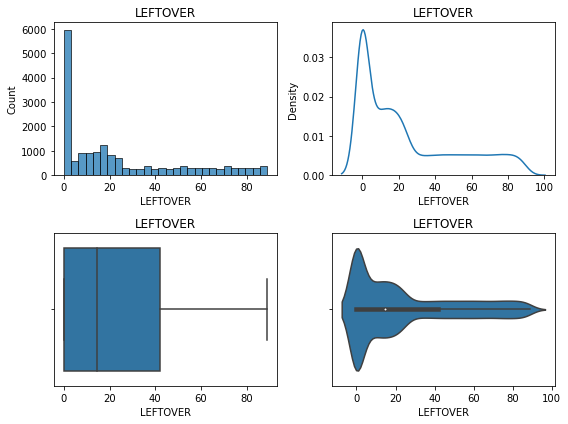

In [14]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x='LEFTOVER')
plt.title('LEFTOVER')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x='LEFTOVER')
plt.title('LEFTOVER')

plt.subplot(2,2,3)
sns.boxplot(data=mobile, x='LEFTOVER')
plt.title('LEFTOVER')

plt.subplot(2,2,4)
sns.violinplot(data=mobile, x='LEFTOVER')
plt.title('LEFTOVER')

plt.tight_layout()
plt.show()

- 마찬가지로 잔여시간이 아예 발생하지 않는 사용자가 매우 많다. 이를 제외한 나머지 사용자는 17% 근방에서 최빈값을 갖는 것으로 보인다.
- 사용자 유형별로 평균 통화시간이나 만족도 설문등을 비교할 수 있다.

### 5) HOUSE

- HOUSE는 집 가격이다.
- HOUSE는 숫자형 변수이다.

In [15]:
print('NAN 갯수 :', mobile['HOUSE'].isna().sum())

NAN 갯수 : 215


- HOUSE는 NAN인 값이 215개이다.
- 집 값 데이터는 통신사의 영업과 관련이 없기 때문에 NAN값이 존재하는 것으로 보인다.

In [16]:
print(mobile['HOUSE'].describe())

count     17785.000000
mean     492950.532696
std      252175.173507
min      150015.000000
25%      263876.000000
50%      452277.000000
75%      701460.000000
max      999970.000000
Name: HOUSE, dtype: float64


- 집 가격은 평균 $492950이다.

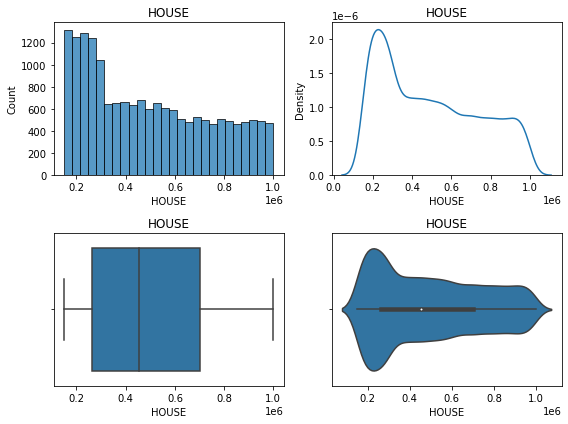

In [17]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x='HOUSE')
plt.title('HOUSE')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x='HOUSE')
plt.title('HOUSE')

plt.subplot(2,2,3)
sns.boxplot(data=mobile, x='HOUSE')
plt.title('HOUSE')

plt.subplot(2,2,4)
sns.violinplot(data=mobile, x='HOUSE')
plt.title('HOUSE')

plt.tight_layout()
plt.show()

- 집 가격은 연 수입액과 비슷한 양상을 보인다.
- 연 수입액과 마찬가지로 사용자의 소득 수준을 살펴보는 수치로 사용할 수 있다.

### 6) HANDSET_PRICE

- HANDSET_PRICE는 핸드폰 가격이다.
- HANDSET_PRICE는 숫자형 변수이다.

In [18]:
print('NAN 갯수 :', mobile['HANDSET_PRICE'].isna().sum())

NAN 갯수 : 0


- HANDSET_PRICE는 NAN인 값이 없다.

In [19]:
print(mobile['HANDSET_PRICE'].describe())

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64


- 핸드폰 가격은 평균 \\$390이다. 단 최솟값은 \\$130, 최댓값은 \\$899이다.

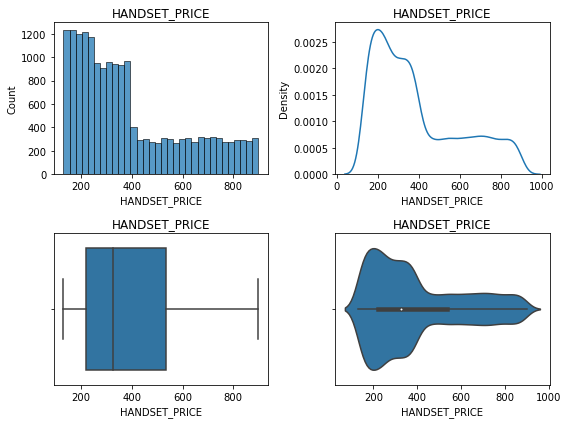

In [20]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x='HANDSET_PRICE')
plt.title('HANDSET_PRICE')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x='HANDSET_PRICE')
plt.title('HANDSET_PRICE')

plt.subplot(2,2,3)
sns.boxplot(data=mobile, x='HANDSET_PRICE')
plt.title('HANDSET_PRICE')

plt.subplot(2,2,4)
sns.violinplot(data=mobile, x='HANDSET_PRICE')
plt.title('HANDSET_PRICE')

plt.tight_layout()
plt.show()

- 핸드폰은 저가형 핸드폰을 사용하는 그룹, 중저가형을 사용하는 그룹이 많은 부분을 차지하고 있다.
- 핸드폰 가격은 연 수입액, 집 가격 등과 관련하여 사용자의 소득 수준을 파악하는 수치로 사용할 수 있다.

### 7) CHURN(target)

- CHURN는 이탈여부이며 1이면 이탈이고 0이면 잔류다.
- CHURN는 범주형 변수이다.

In [21]:
print('NAN 갯수 :', mobile['CHURN'].isna().sum())

NAN 갯수 : 0


- CHURN는 NAN인 값이 없다.

In [22]:
print(mobile['CHURN'].value_counts())
print(mobile['CHURN'].value_counts()/len(mobile['CHURN']))

0    9131
1    8869
Name: CHURN, dtype: int64
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


- 이탈 비율이 50.7%, 잔류 비율이 49.3%이다.

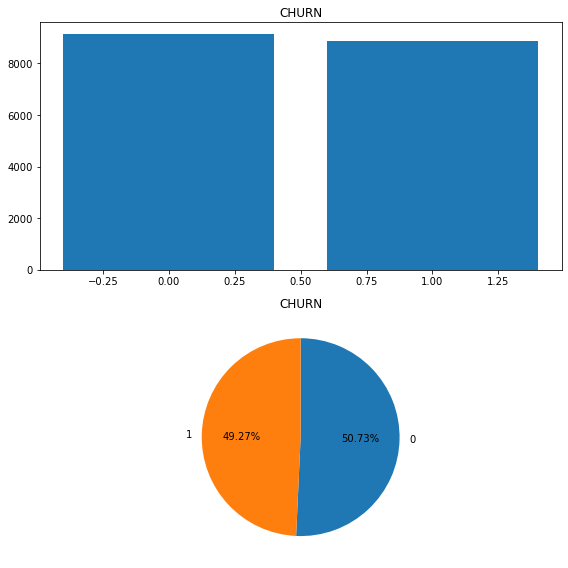

In [23]:
cnt = mobile['CHURN'].value_counts()

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.bar(cnt.index, cnt.values)
plt.title('CHURN')

plt.subplot(2,1,2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       startangle=90, counterclock=False)
plt.title('CHURN')

plt.tight_layout()
plt.show()

- 이탈여부는 각각 49.3%, 50.7%로 거의 같다. 따라서 이탈 비율은 1 대 1이다.
- 이탈여부와 연 수입액, 만족도 설문 등을 비교할 수 있을 것이다.

### 8) AVERAGE_CALL_DURATION

- AVERAGE_CALL_DURATION은 평균 통화시간이다.
- AVERAGE_CALL_DURATION은 숫자형 변수이다.

In [24]:
print('NAN 갯수 :', mobile['AVERAGE_CALL_DURATION'].isna().sum())

NAN 갯수 : 0


- AVERAGE_CALL_DURATION은 NAN인 값이 없다.

In [25]:
print(mobile['AVERAGE_CALL_DURATION'].describe())

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64


- 평균 통화시간은 평균 6분이다.

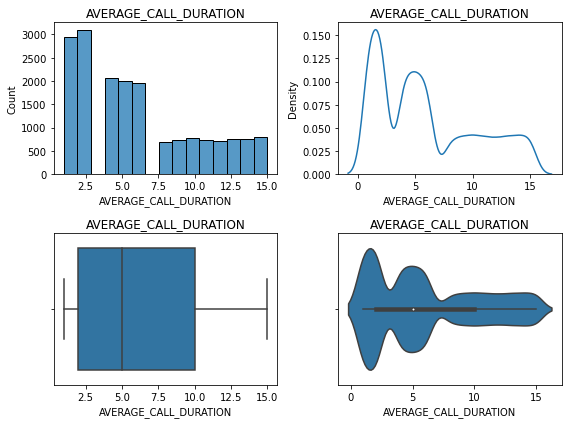

In [26]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x='AVERAGE_CALL_DURATION', bins=15)
plt.title('AVERAGE_CALL_DURATION')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x='AVERAGE_CALL_DURATION')
plt.title('AVERAGE_CALL_DURATION')

plt.subplot(2,2,3)
sns.boxplot(data=mobile, x='AVERAGE_CALL_DURATION')
plt.title('AVERAGE_CALL_DURATION')

plt.subplot(2,2,4)
sns.violinplot(data=mobile, x='AVERAGE_CALL_DURATION')
plt.title('AVERAGE_CALL_DURATION')

plt.tight_layout()
plt.show()

- 평균 통화 시간은 크게 세 그룹으로 나뉜다.
- 평균 통화시간은 월 초과사용 시간, 월 사용 잔여시간 등과 비교 분석할 수 있다.

### 9) REPORTED_SATISFACTION

- REPORTED_SATISFACTION는 만족도 설문이며 5가지로 나뉘어져 있다.
- REPORTED_SATISFACTION는 범주형 변수이다.

In [27]:
print('NAN 갯수 :', mobile['REPORTED_SATISFACTION'].isna().sum())

NAN 갯수 : 38


- REPORTED_SATISFACTION는 NAN인 값이 38건 있다.

In [28]:
print(mobile['REPORTED_SATISFACTION'].value_counts())
print(mobile['REPORTED_SATISFACTION'].value_counts()/len(mobile['REPORTED_SATISFACTION']))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


- 만족도 설문은 전처리가 필요하다.

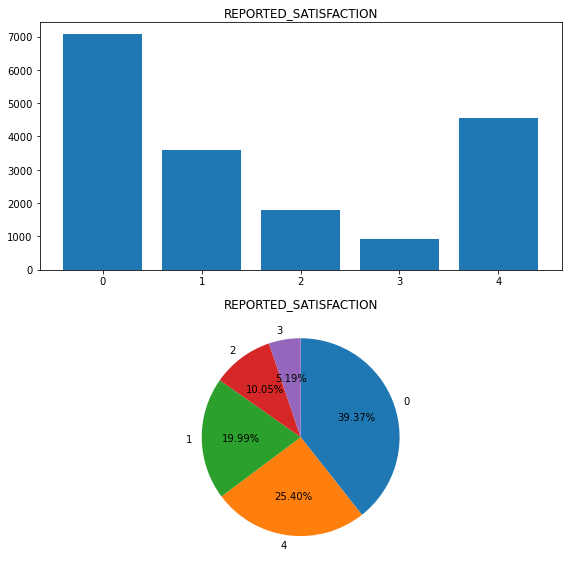

In [29]:
data = mobile.copy()
data[data['REPORTED_SATISFACTION'] == 'very_unsat'] = 0
data[data['REPORTED_SATISFACTION'] == 'unsat'] = 1
data[data['REPORTED_SATISFACTION'] == 'avg'] = 2
data[data['REPORTED_SATISFACTION'] == 'sat'] = 3
data[data['REPORTED_SATISFACTION'] == 'very_sat'] = 4

cnt = data['REPORTED_SATISFACTION'].value_counts()

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.bar(cnt.index, cnt.values)
plt.title('REPORTED_SATISFACTION')

plt.subplot(2,1,2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       startangle=90, counterclock=False)
plt.title('REPORTED_SATISFACTION')

plt.tight_layout()
plt.show()

- 매우 만족하는 사람과 매우 불만족인 사람으로 만족도 설문이 극단적으로 나뉜다.
- 따라서 만족도에 따른 이탈여부나 변경 계획 설문을 비교할 수 있다.

### 10) CONSIDERING_CHANGE_OF_PLAN

- CONSIDERING_CHANGE_OF_PLAN은 변경 계획 설문이며 5가지로 나뉘어져 있다.
- CONSIDERING_CHANGE_OF_PLAN은 범주형 변수이다.

In [30]:
print('NAN 갯수 :', mobile['CONSIDERING_CHANGE_OF_PLAN'].isna().sum())

NAN 갯수 : 0


- CONSIDERING_CHANGE_OF_PLAN은 NAN인 값이 없다.

In [31]:
print(mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts())
print(mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts()/len(mobile['CONSIDERING_CHANGE_OF_PLAN']))

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


- 변경 계획 설문은 전처리가 필요하다.

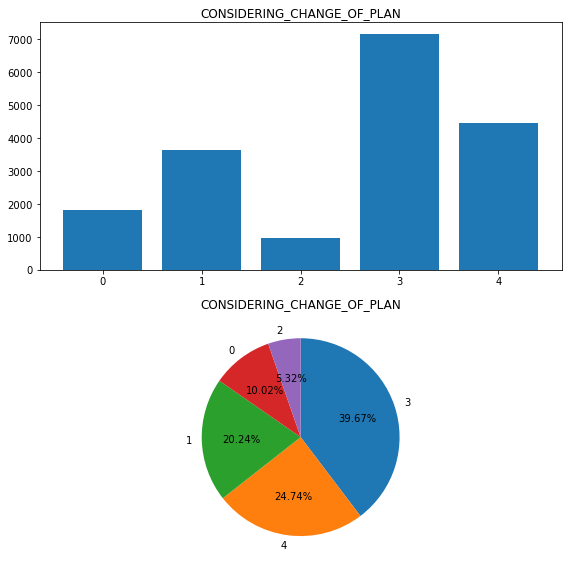

In [32]:
data = mobile.copy()
data[data['CONSIDERING_CHANGE_OF_PLAN'] == 'never_thought'] = 0
data[data['CONSIDERING_CHANGE_OF_PLAN'] == 'no'] = 1
data[data['CONSIDERING_CHANGE_OF_PLAN'] == 'perhaps'] = 2
data[data['CONSIDERING_CHANGE_OF_PLAN'] == 'considering'] = 3
data[data['CONSIDERING_CHANGE_OF_PLAN'] == 'actively_looking_into_it'] = 4

cnt = data['CONSIDERING_CHANGE_OF_PLAN'].value_counts()

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.bar(cnt.index, cnt.values)
plt.title('CONSIDERING_CHANGE_OF_PLAN')

plt.subplot(2,1,2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       startangle=90, counterclock=False)
plt.title('CONSIDERING_CHANGE_OF_PLAN')

plt.tight_layout()
plt.show()

- 변경을 계획하는 사람이 상당히 많다.
- 변경 계획자의 구성이 어떠한지 분석이 필요하다.

## 3.이변량 분석 
* 유의수준 : 5%
* 숫자 --> 숫자 : 상관분석
* 범주 --> 범주 : 카이제곱검정
* 범주 --> 숫자 : t검정, 분산분석
* 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [33]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
① 교차표(pd.crosstab())  
② 시각화( Stacked Bar, Mosaic)  
③ 가설검정(카이제곱검정)

#### 1) COLLEGE --> CHURN

In [34]:
feature = 'COLLEGE'

In [35]:
pd.crosstab(mobile[target], mobile[feature])

COLLEGE,0,1
CHURN,,
0,4616,4515
1,4335,4534


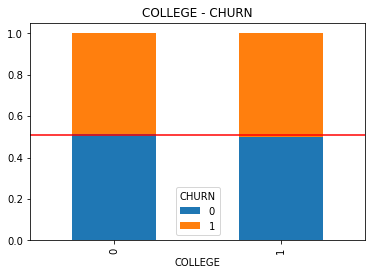

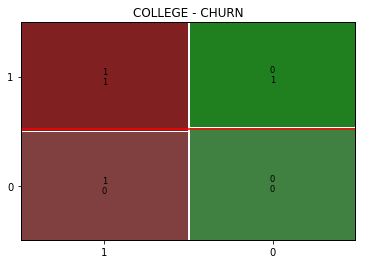

In [36]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.title(feature + ' - ' + target)
plt.show()

mosaic(mobile, [feature, target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.title(feature + ' - ' + target)
plt.show()

In [37]:
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 4.982102934693503
p-value 0.025610833478220536
기대빈도
 [[4540.64338889 4590.35661111]
 [4410.35661111 4458.64338889]]


- 대학졸업 여부와 이탈여부는 평균에서 거의 차이가 없어보인다.
- 하지만 카이제곱통계량이 자유도인 1의 4.9배이고 p-value 0.0256은 0.05보다 약간 작으므로 대학졸업 여부와 이탈여부는 중간 관계에 있다.

#### 2) REPORTED_SATISFACTION --> CHURN

In [38]:
feature = 'REPORTED_SATISFACTION'

data = mobile.copy()
data = data[data.notna()]
data[feature] = data[feature].map({'very_unsat':0, 'unsat':1, 'avg':2, 'sat':3, 'very_sat':4})

In [39]:
pd.crosstab(data[target], data[feature])

REPORTED_SATISFACTION,0.0,1.0,2.0,3.0,4.0
CHURN,,,,,
0,3543,1792,952,492,2334
1,3529,1798,854,440,2228


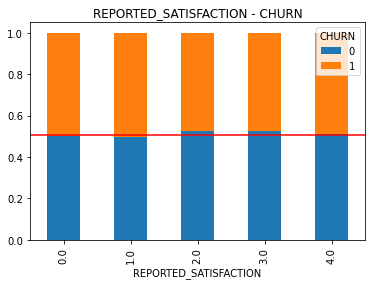

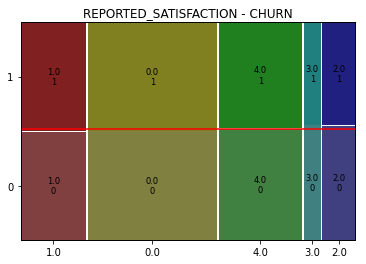

In [40]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.title(feature + ' - ' + target)
plt.show()

mosaic(data, [feature, target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.title(feature + ' - ' + target)
plt.show()

In [41]:
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066
기대빈도
 [[ 916.27201871  472.84912593 1821.38236277 2314.5254426  3587.97104999]
 [ 889.72798129  459.15087407 1768.61763723 2247.4745574  3484.02895001]]


- 만족도 설문 결과에 따른 이탈여부가 모든 결과에서 평균과 거의 일치한다.
- 카이제곱통계량이 자유도인 4의 2배 미만이다. p-value 0.145로 0.05보다 크다. 따라서 만족도 설문과 이탈 여부는 관련이 없다.

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [42]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

data = mobile.copy()
data[feature] = data[feature].map({'never_thought':0, 'no':1, 'perhaps':2, 'considering':3, 'actively_looking_into_it':4})

In [43]:
pd.crosstab(data[target], data[feature])

CONSIDERING_CHANGE_OF_PLAN,0,1,2,3,4
CHURN,,,,,
0,926,1823,456,3648,2278
1,878,1821,502,3493,2175


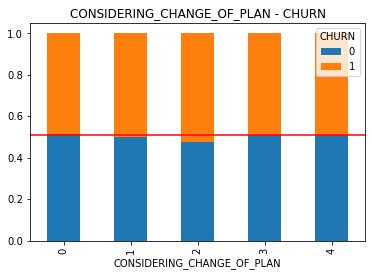

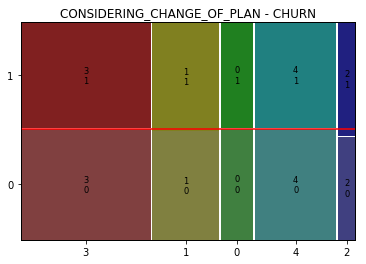

In [44]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data[target].mean(), color = 'r')
plt.title(feature + ' - ' + target)
plt.show()

mosaic(data, [feature, target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.title(feature + ' - ' + target)
plt.show()

In [45]:
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 5.421434419620689
p-value 0.2467222586679969
기대빈도
 [[2258.90794444 3622.47061111  915.12911111 1848.52022222  485.97211111]
 [2194.09205556 3518.52938889  888.87088889 1795.47977778  472.02788889]]


- 변경 계획 설문 결과에 따른 이탈률과 실제 이탈률은 큰 차이가 없다.
- 자유도가 4, 카이제곱통계량이 5.4이며, p-value도 0.247로 0.05에 비해 매우 크므로 변경 계획 설문과 이탈여부는 관련이 없다.

### (2) 숫자형 Feature --> CHURN 
① 그래프 : histogram, densityplot   
② 수치화 : 로지스틱회귀

#### 1) OVERAGE --> CHURN


In [46]:
feature = 'OVERAGE'

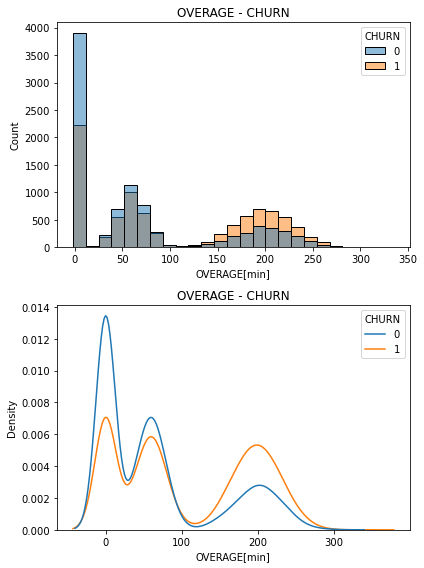

In [47]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(data=mobile, x=feature, hue=target)
plt.xlabel(feature + '[min]')
plt.title(feature +' - '+target)

plt.subplot(2,1,2)
sns.kdeplot(data=mobile, x=feature, hue=target, common_norm=False)
plt.xlabel(feature + '[min]')
plt.title(feature +' - '+target)

plt.tight_layout()
plt.show()

In [48]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


- 월 초과시간이 없거나 적은 경우에 이탈여부가 적으나 월 초과시간이 많은 경우에 이탈여부가 크다. p-value는 3e-97로 0.05보다 매우 작다. 따라서 월 초과사용 시간과 이탈여부는 강한 관계가 있다. 
- 월 초과시간은 적절한 요금제가 없어서 발생하는 것일 수도 있으므로 적절한 요금제를 추천해주어 초과시간을 줄이는 쪽으로 마케팅 전략을 세워야 할 것이다.

#### 2) LEFTOVER --> CHURN


In [49]:
feature = 'LEFTOVER'

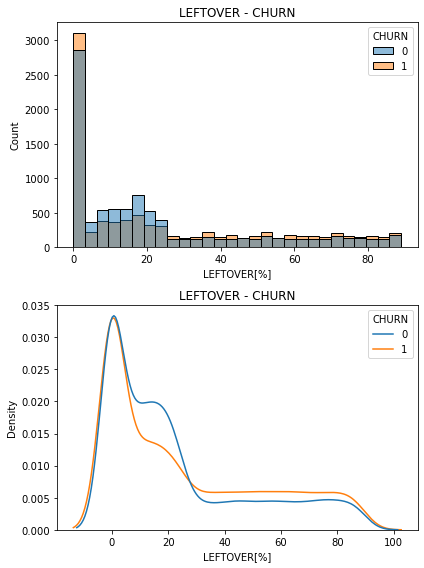

In [50]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(data=mobile, x=feature, hue=target)
plt.xlabel(feature + '[%]')
plt.title(feature +' - '+target)

plt.subplot(2,1,2)
sns.kdeplot(data=mobile, x=feature, hue=target, common_norm=False)
plt.xlabel(feature + '[%]')
plt.title(feature +' - '+target)

plt.tight_layout()
plt.show()

In [51]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


- 월 사용 잔여시간이 낮은 그룹은 이탈여부가 평균보다 작다. 하지만 월 사용 잔여시간이 35% 넘어가면 이탈여부가 평균보다 높다. p-value는 3e-6으로 0.05보다 작다. 따라서 월 사용 잔여시간과 이탈여부는 강한 관계에 있다.
- 월 초과사용 시간과 마찬가지로 월 사용 잔여시간이 많다는 것은 사용자가 적절한 요금제를 사용하지 못하고 있는 것이다. 따라서 적절한 요금제를 사용자에게 추천하여 월 사용 잔여시간을 감소시키고 이탈률을 줄여야한다.

#### 3) HANDSET_PRICE --> CHURN


In [52]:
feature = 'HANDSET_PRICE'

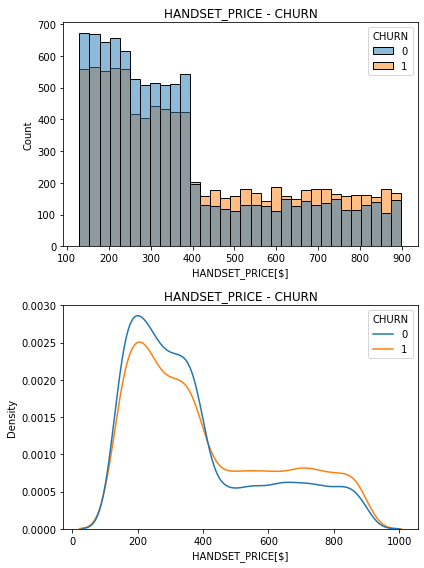

In [53]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(data=mobile, x=feature, hue=target)
plt.xlabel(feature + '[$]')
plt.title(feature +' - '+target)

plt.subplot(2,1,2)
sns.kdeplot(data=mobile, x=feature, hue=target, common_norm=False)
plt.xlabel(feature + '[$]')
plt.title(feature +' - '+target)

plt.tight_layout()
plt.show()

In [54]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


- 핸드폰 가격과 이탈률은 비례한다. p-value도 0.0001로 0.15보다 작다. 따라서 핸드폰 가격과 이탈여부는 중간 관계에 있다.
- 핸드폰 가격은 이탈여부는 관계가 있다. 하지만 하지만 월 초과사용 시간, 월 사용 잔여시간 만큼 강한 관계에 있는 것은 아니다. 따라서 핸드폰 사용요금과 월 초과사용 시간, 월 사용 잔여시간의 관계 등을 살펴봐야할 것이다.

#### 4) AVERAGE_CALL_DURATION --> CHURN


In [55]:
feature = 'AVERAGE_CALL_DURATION'

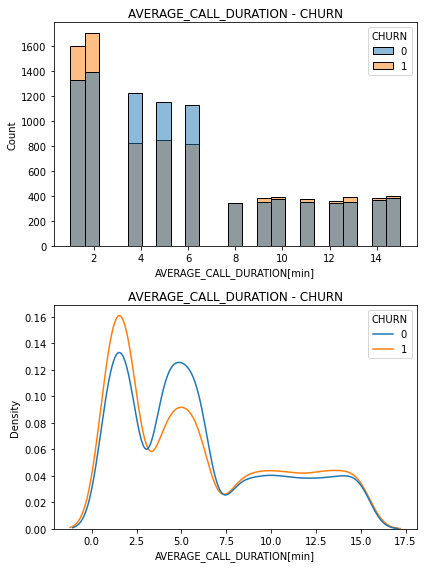

In [56]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(data=mobile, x=feature, hue=target)
plt.xlabel(feature + '[min]')
plt.title(feature +' - '+target)

plt.subplot(2,1,2)
sns.kdeplot(data=mobile, x=feature, hue=target, common_norm=False)
plt.xlabel(feature + '[min]')
plt.title(feature +' - '+target)

plt.tight_layout()
plt.show()

In [57]:
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


- 평균 통화시간이 적은 그룹은 이탈률이 높다. 평균 통화시간이 5분대인 그룹은 이탈률이 평균보다 적다. 평균 통화시간이 높은 그룹은 이탈률이 평균보다 약간 높다. p-value는 0.038로 0.05보다 약간 작으므로 평균 통화시간과 이탈여부는 중간 관계에 있다.
- 크게 세 그룹으로 나뉘며 그룹별로 이탈여부의 편차가 있다. 그룹별로 다른 변수들에서 어떠한 차이가 있는지 확인할 수 있다.

## 4.관계 정리

### 1) 강한관계의 변수

1. OVERAGE - CHURN
1. LEFTOVER - CHURN
1. HANDSET_PRICE - CHURN

### 2) 약한관계의 변수

1. COLLEGE - CHURN
1. AVERAGE_CALL_DURATION - CHURN

## 3) 관계 없음

1. REPORTED_SATISFACTION - CHURN
1. CONSIDERING_CHANGE_OF_PLAN - CHURN

## 5.추가 분석

### 1) AVERAGE_CALL_DURATION --> CHURN 세부 분석

In [58]:
feature = 'AVERAGE_CALL_DURATION'

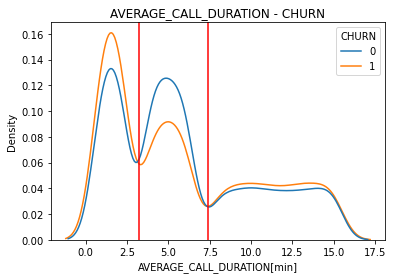

In [59]:
sns.kdeplot(data=mobile, x=feature, hue=target, common_norm=False)
plt.xlabel(feature + '[min]')
plt.axvline(3.2, color = 'r')
plt.axvline(7.4, color = 'r')
plt.title(feature +' - '+target)
plt.show()

- 평균 통화시간은 크게 세 가지 그룹으로 나뉜다. 따라서 그룹 별로 분류하여 분석할 수 있다.
- 따라서 평균 통화시간을 세 그룹으로 나누어 월 사용 잔여시간을 분석할 것이다.

### 2) LEFTOVER --> CHURN (AVERAGE_CALL_DURATION < 3.2)

In [60]:
feature2 = 'LEFTOVER'

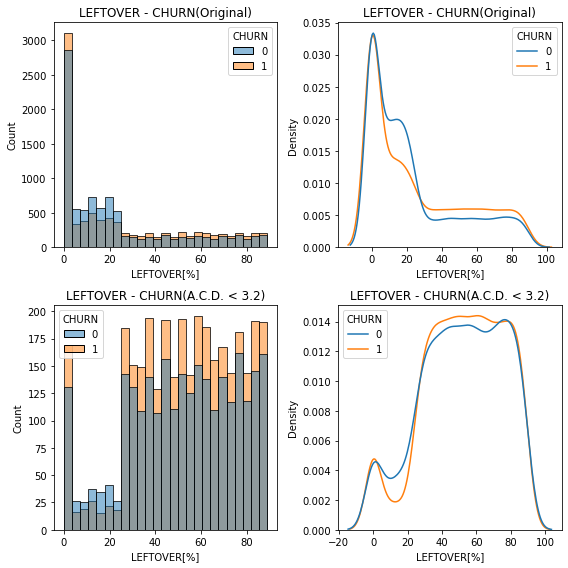

In [61]:
data = mobile.loc[mobile[feature] < 3.2].copy()

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x=feature2, hue=target, bins=25)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(Original)')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x=feature2, hue=target, common_norm=False)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(Original)')

plt.subplot(2,2,3)
sns.histplot(data=data, x=feature2, hue=target, bins=25)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(A.C.D. < 3.2)')

plt.subplot(2,2,4)
sns.kdeplot(data=data, x=feature2, hue=target, common_norm=False)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(A.C.D. < 3.2)')

plt.tight_layout()
plt.show()

In [62]:
model = sm.Logit(data[target], data[feature2])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.688385
         Iterations 3
LEFTOVER    4.058460e-14
dtype: float64


- 평균 통화시간이 3.2분 보다 작은 그룹은 월 사용 잔여시간이 매우 크다. 따라서 요금제 변경을 통해 월 사용 잔여시간을 감소시켜야 한다.

### 3) LEFTOVER --> CHURN (3.2 < AVERAGE_CALL_DURATION < 7.4)

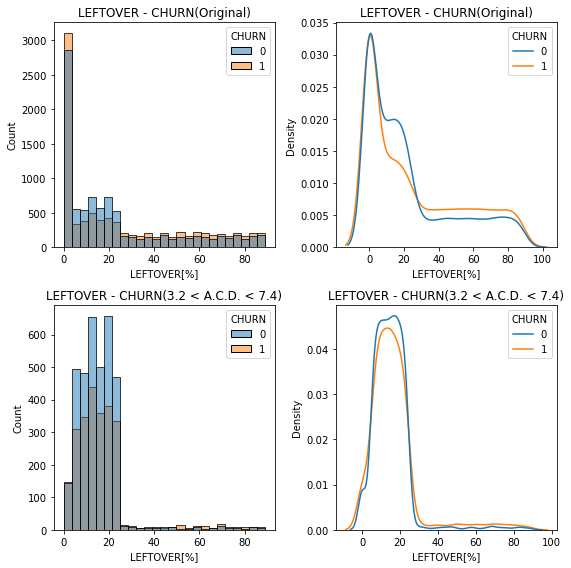

In [63]:
data = mobile.loc[(mobile[feature] > 3.2) & (mobile[feature] < 7.4)].copy()

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x=feature2, hue=target, bins=25)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(Original)')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x=feature2, hue=target, common_norm=False)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(Original)')

plt.subplot(2,2,3)
sns.histplot(data=data, x=feature2, hue=target, bins=25)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(3.2 < A.C.D. < 7.4)')

plt.subplot(2,2,4)
sns.kdeplot(data=data, x=feature2, hue=target, common_norm=False)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(3.2 < A.C.D. < 7.4)')

plt.tight_layout()
plt.show()

In [64]:
model = sm.Logit(data[target], data[feature2])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.688019
         Iterations 4
LEFTOVER    1.033682e-14
dtype: float64


- 평균 통화시간이 3.2분 보다 크고 7.4분보다 작은 그룹은 월 사용 잔여 시간이 매우 적다. 따라서 별다른 조치를 취하지 않아도 될 것으로 보인다.

### 4) LEFTOVER --> CHURN (7.4 < AVERAGE_CALL_DURATION)

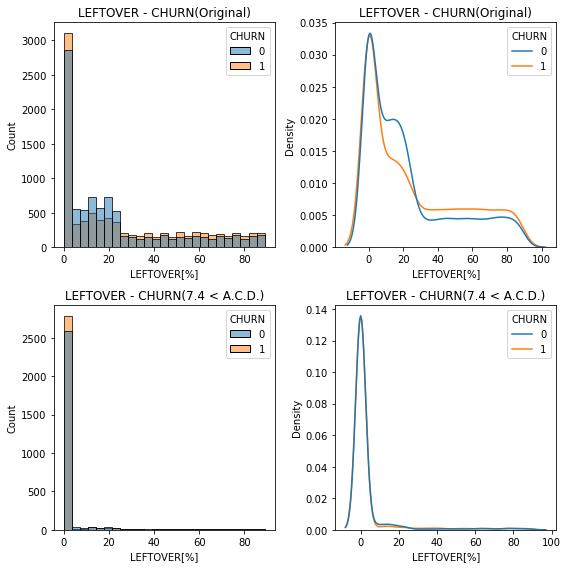

In [65]:
data = mobile.loc[mobile[feature] > 7.4].copy()

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.histplot(data=mobile, x=feature2, hue=target, bins=25)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(Original)')

plt.subplot(2,2,2)
sns.kdeplot(data=mobile, x=feature2, hue=target, common_norm=False)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(Original)')

plt.subplot(2,2,3)
sns.histplot(data=data, x=feature2, hue=target, bins=25)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(7.4 < A.C.D.)')

plt.subplot(2,2,4)
sns.kdeplot(data=data, x=feature2, hue=target, common_norm=False)
plt.xlabel(feature2 + '[%]')
plt.title(feature2 +' - '+target+'(7.4 < A.C.D.)')

plt.tight_layout()
plt.show()

In [66]:
model = sm.Logit(data[target], data[feature2])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693085
         Iterations 3
LEFTOVER    0.391199
dtype: float64


- 평균 통화시간이 7.4분보다 큰 그룹은 월 사용 잔여 시간이 매우 적다. 따라서 별다른 조치를 취하지 않아도 될 것으로 보인다.
- 단, 평균 통화시간이 3.2분보다 작은 그룹과 7.4분보다 큰 그룹, 두 그룹에서 월 사용 잔여시간이 0에 가까운 양상이 있고 그 부분에서 이탈여부가 매우 크다. 이 부분은 별다른 분석이 필요해보인다.

### 5) 결론

- 평균 통화시간이 적은 그룹에서 월 사용 잔여시간이 매우 큰 것으로 나타났다. 월 사용 잔여시간이 클수록 이탈여부가 크게 나타났으므로, 평균 통화시간이 적은 그룹을 적절한 요금제로 변경하여 월 사용 잔여시간을 줄인다면 이탈률을 줄일 수 있을 것으로 보인다.